### PRELIMINARY ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Import libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Import libraries for model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    RocCurveDisplay,
)
# Import libraries for machine learning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [2]:
# Load the dataset
df = pd.read_csv('Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


### DATA CLEANING

In [5]:
null_values = df.isnull().sum()
print(null_values)

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['timestamp', 'gender', 'country', 'occupation', 'self_employed',
       'family_history', 'treatment', 'days_indoors', 'growing_stress',
       'changes_habits', 'mental_health_history', 'mood_swings',
       'coping_struggles', 'work_interest', 'social_weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [7]:
# Drop rows with missing values in 'self_employed' column
df = df.dropna(subset=['self_employed'])

print(df.isnull().sum())

timestamp                  0
gender                     0
country                    0
occupation                 0
self_employed              0
family_history             0
treatment                  0
days_indoors               0
growing_stress             0
changes_habits             0
mental_health_history      0
mood_swings                0
coping_struggles           0
work_interest              0
social_weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [8]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)



Number of duplicate rows: 2304


In [9]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [10]:
# Convert timestamp into datetime format
df.timestamp = pd.to_datetime(df.timestamp)

# Extract year from timestamp
df['year'] = df.timestamp.dt.year

# Extract month from timestamp
df['month'] = df.timestamp.dt.month

In [11]:
# Find out the unique years the surveys were obtained from
np.unique(df['year'])


array([2014, 2015, 2016])

In [12]:
# Find out the unique months in the years that the surveys were obtained from
np.unique(df['month'])

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### EDA

In [13]:
def countsplot(category, palette='GnBu_d'):
    
    sns.countplot(data=df, x=category, palette=palette)
    plt.ylabel("Count")
    plt.title(f"{category} Distribution")
    plt.show()

    
    category_counts = df[category].value_counts()
    category_percentages = df[category].value_counts(normalize=True)

    
    stats_df = pd.DataFrame({"Count": category_counts, "Proportion": category_percentages})
    stats_df["Count"] = stats_df["Count"].apply("{:,}".format)
    stats_df["Proportion"] = stats_df["Proportion"].apply("{:.1%}".format)

    return stats_df


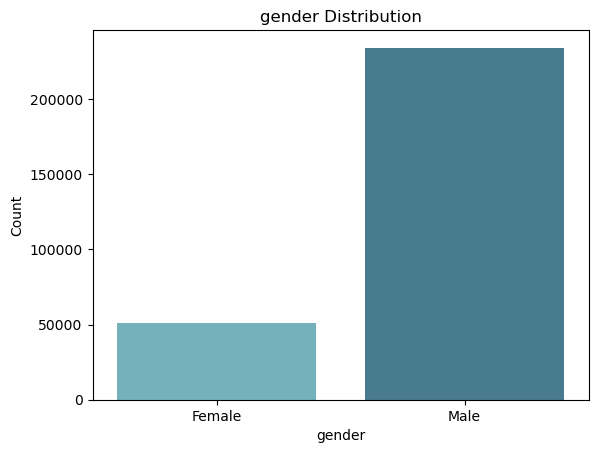

,Count,Proportion
gender,,
Male,"234,000",82.1%
Female,"50,858",17.9%


In [14]:
countsplot("gender")

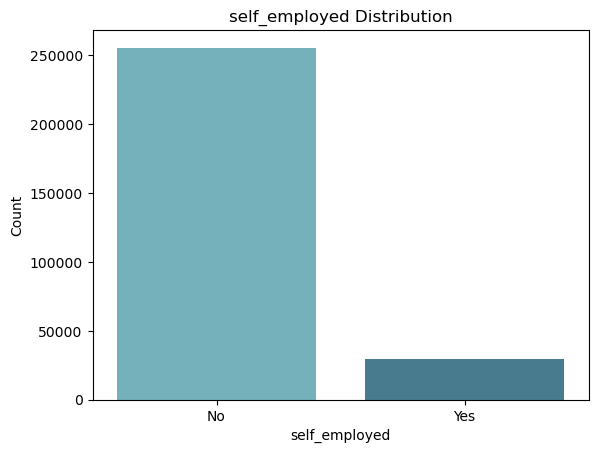

,Count,Proportion
self_employed,,
No,"255,711",89.8%
Yes,"29,147",10.2%


In [15]:
countsplot("self_employed")

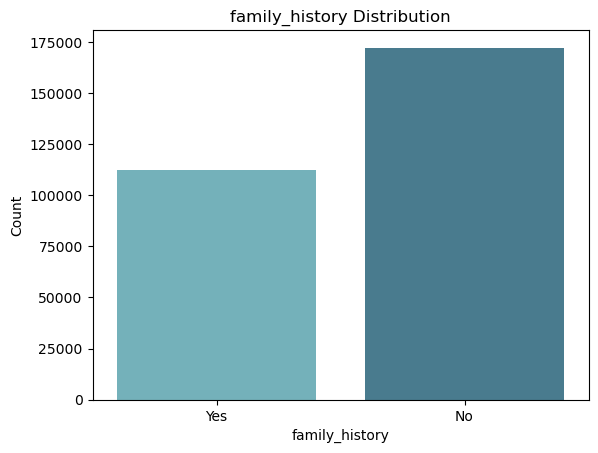

,Count,Proportion
family_history,,
No,"172,357",60.5%
Yes,"112,501",39.5%


In [16]:
countsplot("family_history")

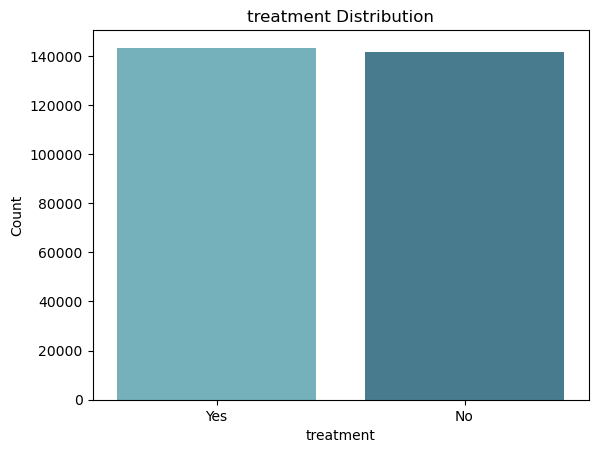

,Count,Proportion
treatment,,
Yes,"143,331",50.3%
No,"141,527",49.7%


In [17]:
countsplot("treatment")


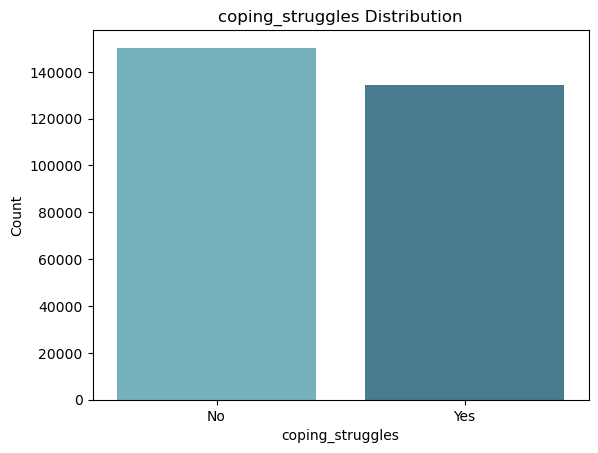

,Count,Proportion
coping_struggles,,
No,"150,318",52.8%
Yes,"134,540",47.2%


In [18]:
countsplot("coping_struggles")

In [19]:
def top_10_bar(category, x_rotation=90, palette='viridis'):
    
    top_10_df = df[category].value_counts().head(10).reset_index()
    top_10_df.columns = ['Category', 'Count']

    # Plotting
    sns.barplot(data=top_10_df, x='Category', y='Count', palette=palette)
    plt.title(f' Categories in {category}')
    plt.xticks(rotation=x_rotation)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.show()


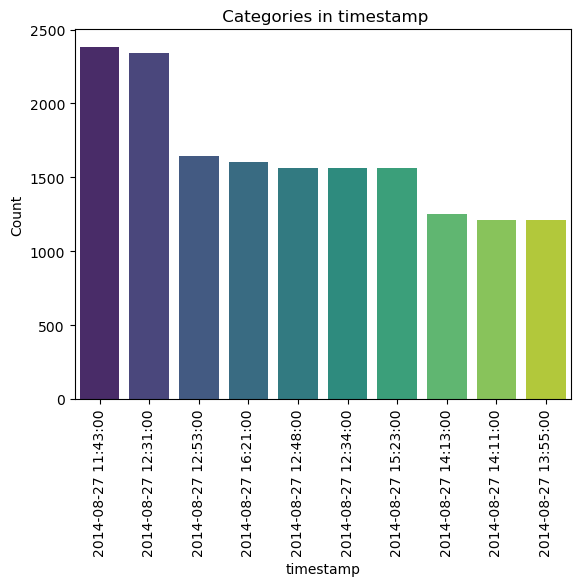

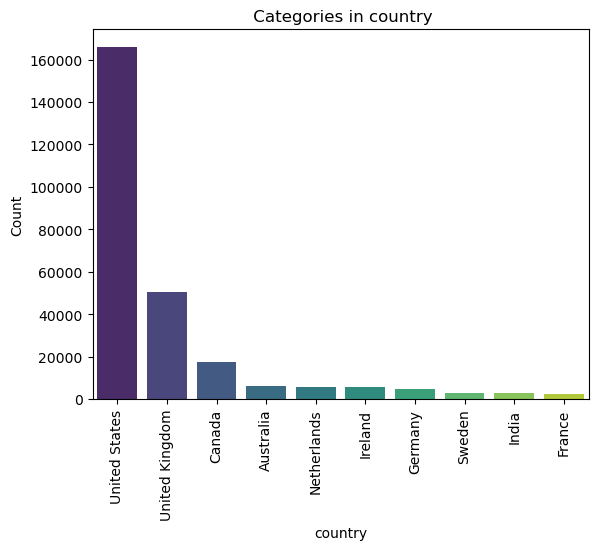

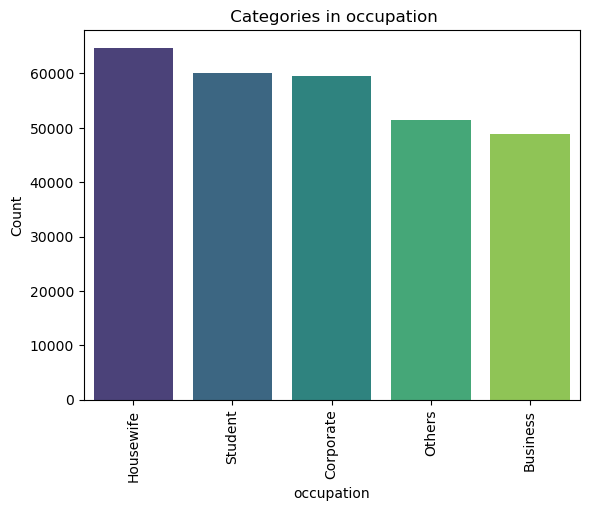

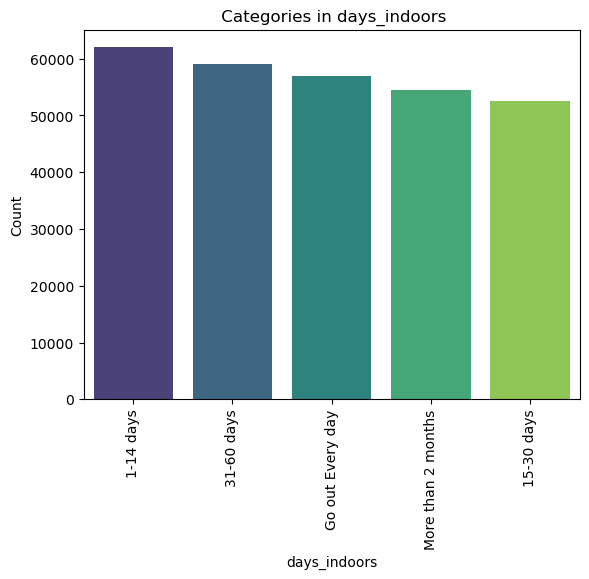

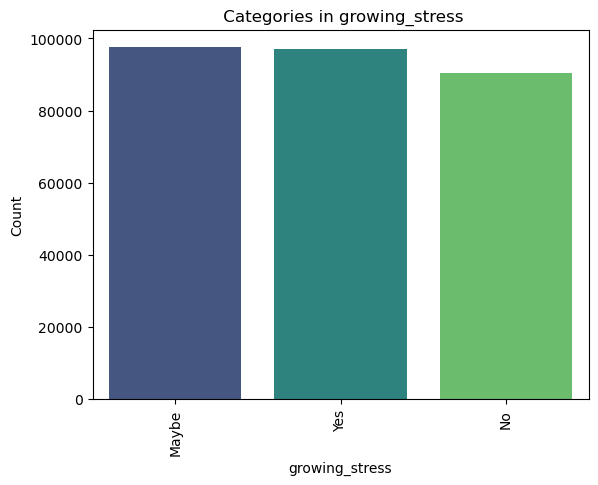

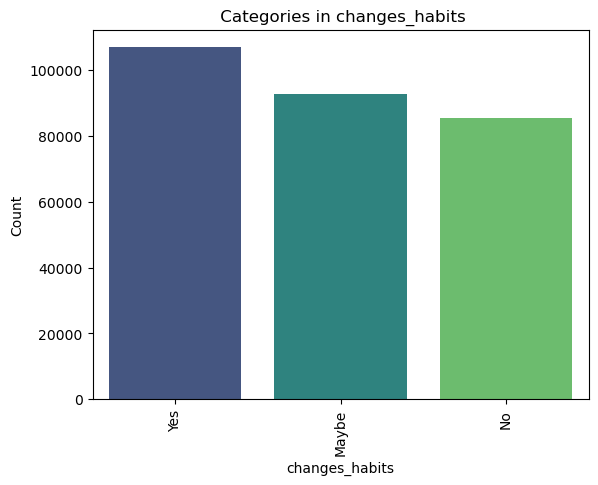

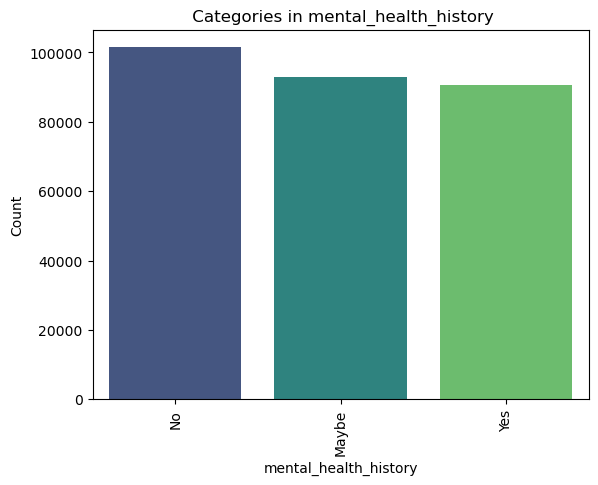

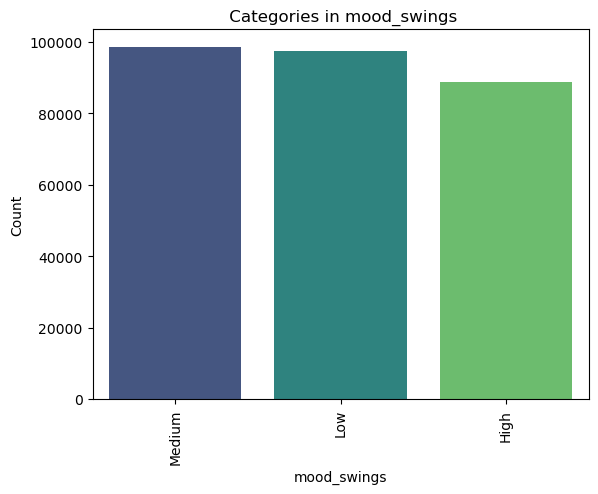

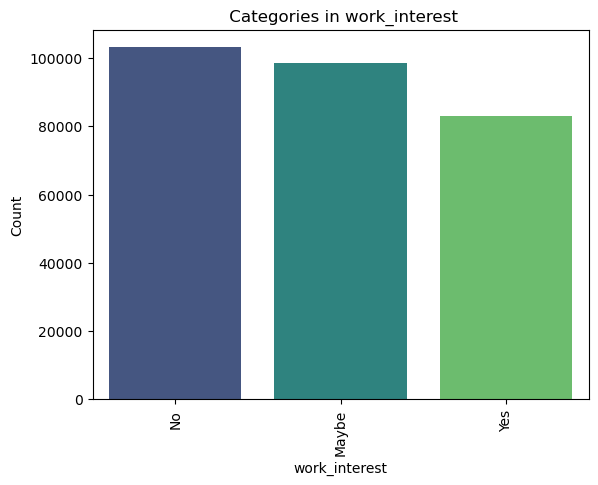

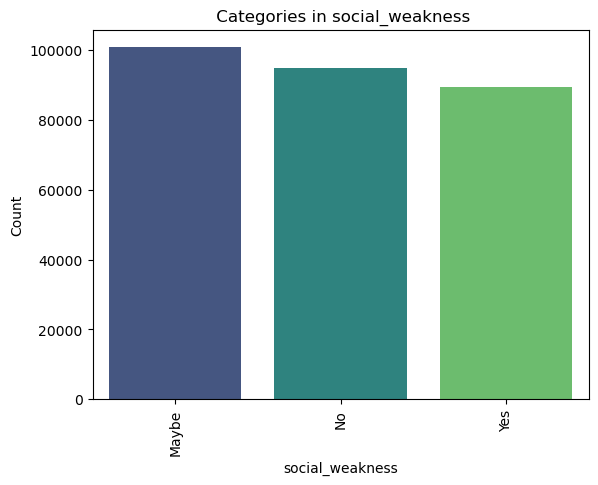

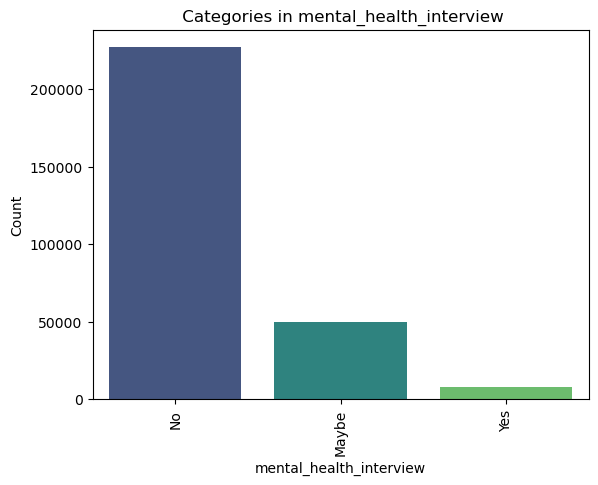

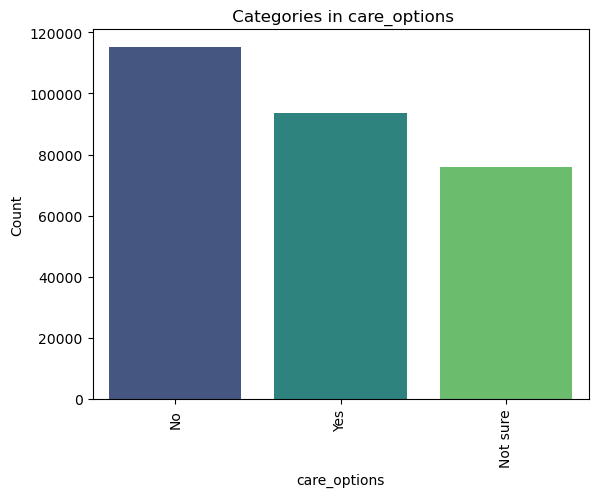

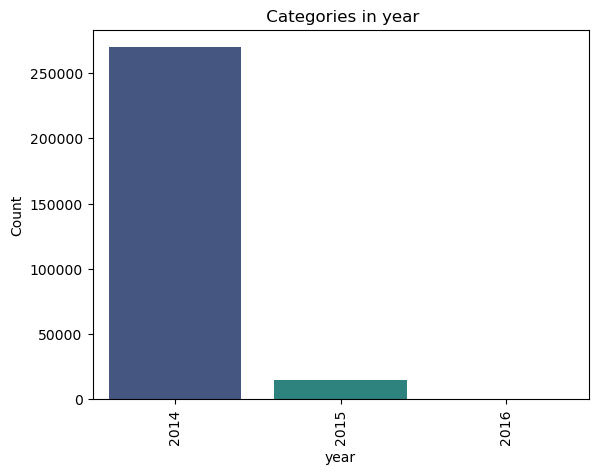

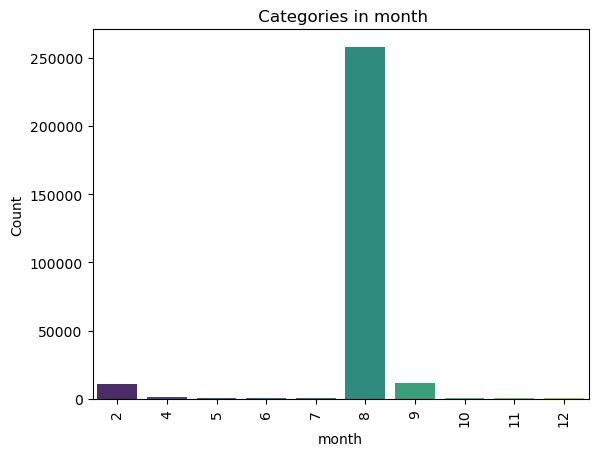

In [20]:
for column in df.columns:
    if df[column].nunique() > 2:
        top_10_bar(column)

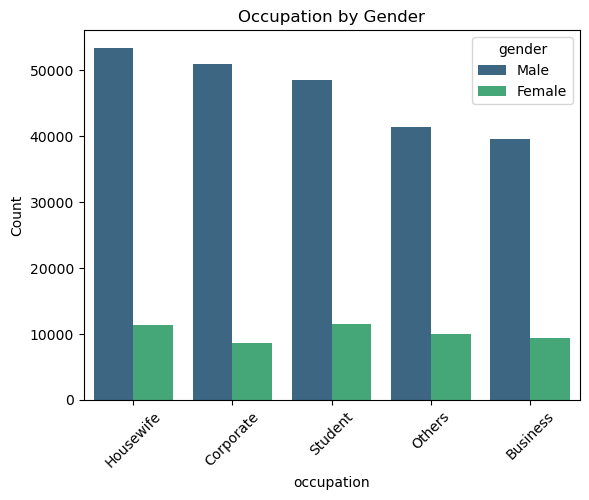

In [21]:
# Group data by Gender then filter by Occupation and count occurrences
gender_data = (
    df
    .groupby("gender")["occupation"]
    .value_counts()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)


sns.barplot(data=gender_data, x="occupation", y="Count", hue="gender", palette="viridis")
plt.title("Occupation by Gender")
plt.xticks(rotation=45)  
plt.show()


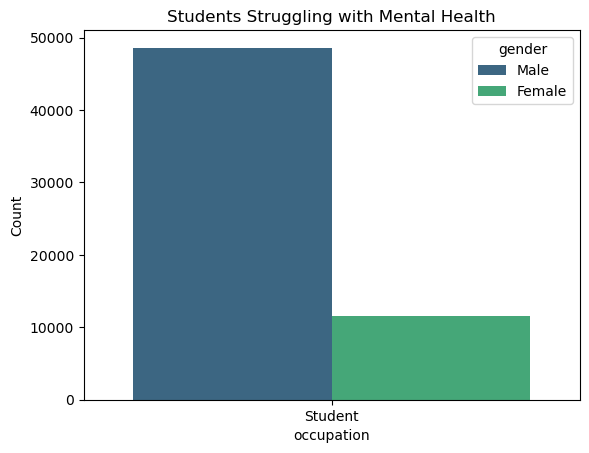

   gender occupation  Count  Percentage
7    Male    Student  48600        80.8
0  Female    Student  11564        19.2


C:\Users\saven\AppData\Local\Temp\ipykernel_18968\3362065796.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data["Percentage"] = student_data["Count"].apply(


In [22]:
# Filter the gender data to include only entries where the occupation is "Student"
student_data = gender_data[gender_data["occupation"] == "Student"]

# Plotting with a custom color palette
sns.barplot(data=student_data, x="occupation", y="Count", hue="gender", palette="viridis")
plt.title("Students Struggling with Mental Health")
plt.show()

# Get the total count
total_student_count = student_data["Count"].sum()

# Calculate percentages based on gender counts
student_data["Percentage"] = student_data["Count"].apply(
    lambda count: round((count / total_student_count) * 100, 1)
)

print(student_data)


In [23]:
print(np.unique(df['occupation']))

['Business' 'Corporate' 'Housewife' 'Others' 'Student']


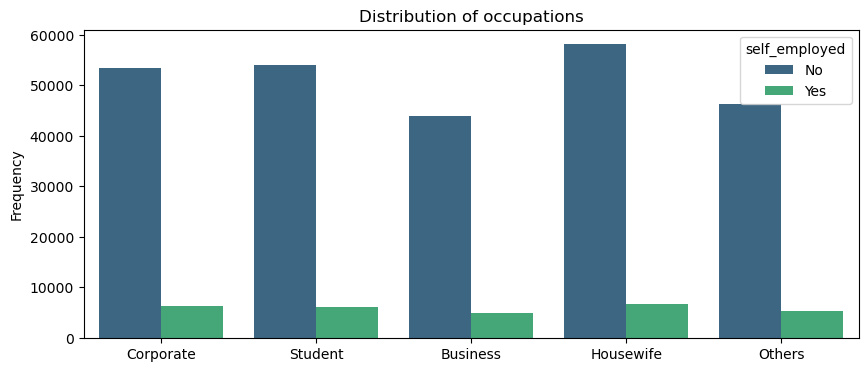

In [24]:
# Visualise the proportion of these occupations are self-employed or not
plt.figure(figsize=(10, 4))
sns.countplot(x='occupation', data=df, palette = 'viridis', hue='self_employed')
plt.title('Distribution of occupations')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

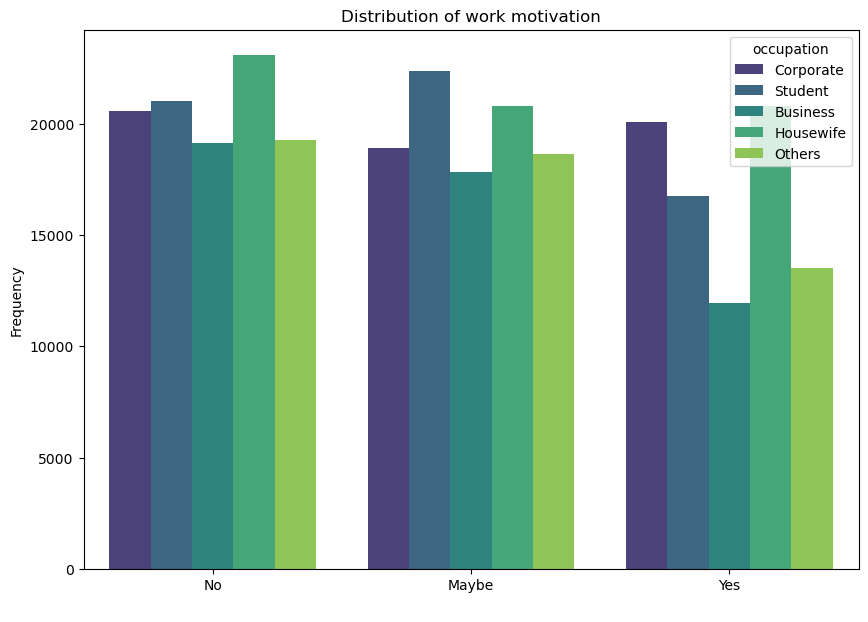

In [25]:

np.unique(df['work_interest'])
plt.figure(figsize=(10, 7))
sns.countplot(x='work_interest', data=df, palette = 'viridis', hue='occupation')
plt.title('Distribution of work motivation')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

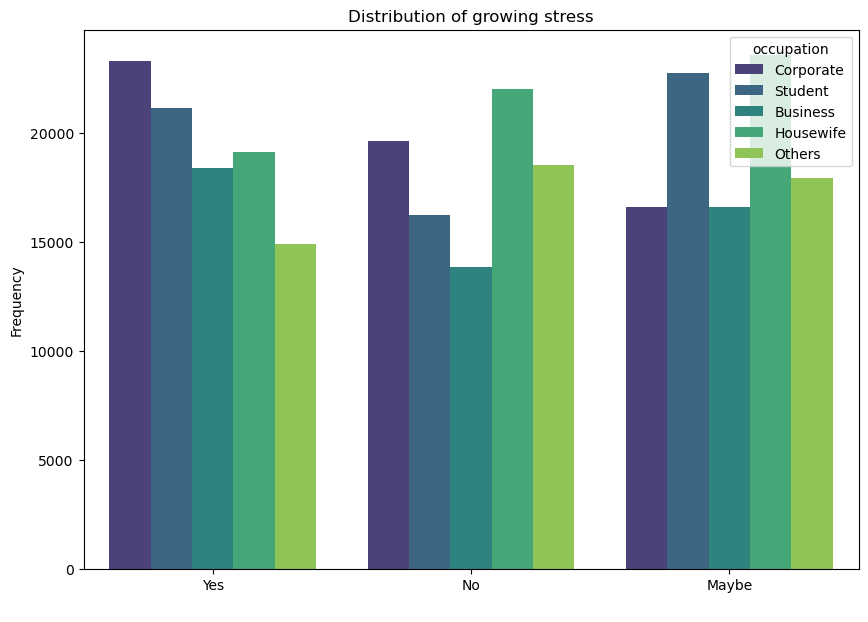

In [26]:
np.unique(df['growing_stress'])


plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, palette = 'viridis', hue='occupation')
plt.title('Distribution of growing stress')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()


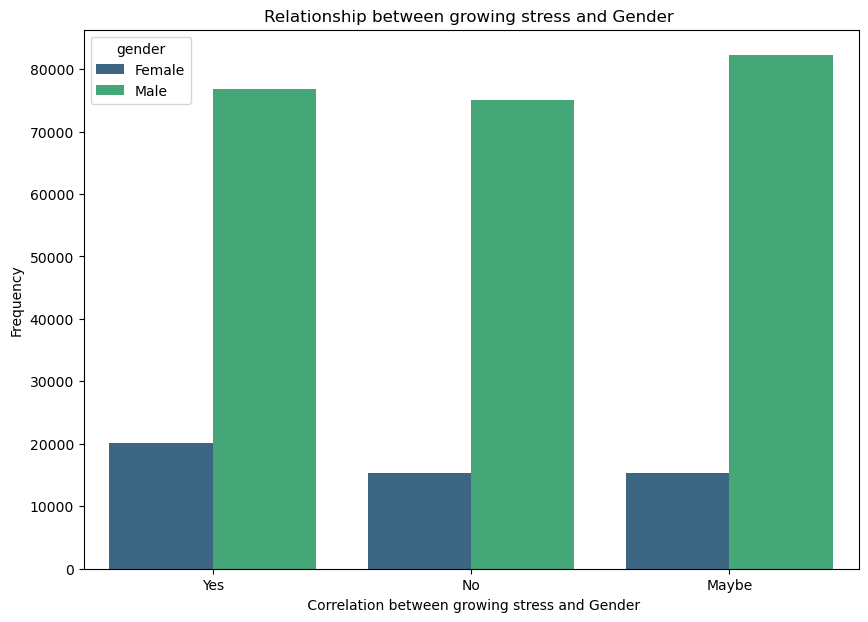

In [27]:

plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, hue='gender',  palette = 'viridis')
plt.title('Relationship between growing stress and Gender ')
plt.xlabel(' Correlation between growing stress and Gender')
plt.ylabel('Frequency')
plt.show()


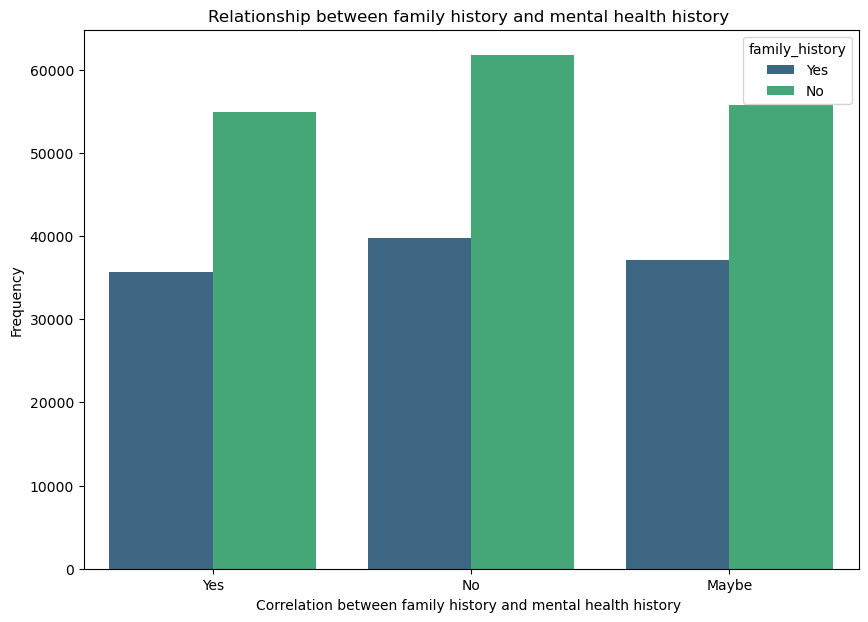

In [28]:
# Correlation between family history and mh history
plt.figure(figsize=(10, 7))
sns.countplot(x='mental_health_history', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between family history and mental health history ')
plt.xlabel('Correlation between family history and mental health history ')
plt.ylabel('Frequency')
plt.show()

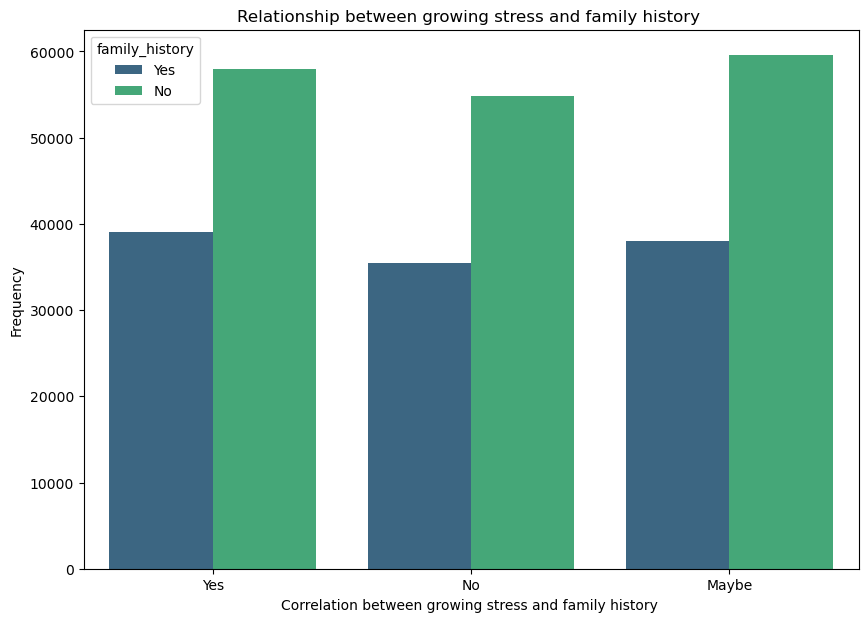

In [29]:

plt.figure(figsize=(10, 7))
sns.countplot(x='growing_stress', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between growing stress and family history ')
plt.xlabel('Correlation between growing stress and family history ')
plt.ylabel('Frequency')
plt.show()


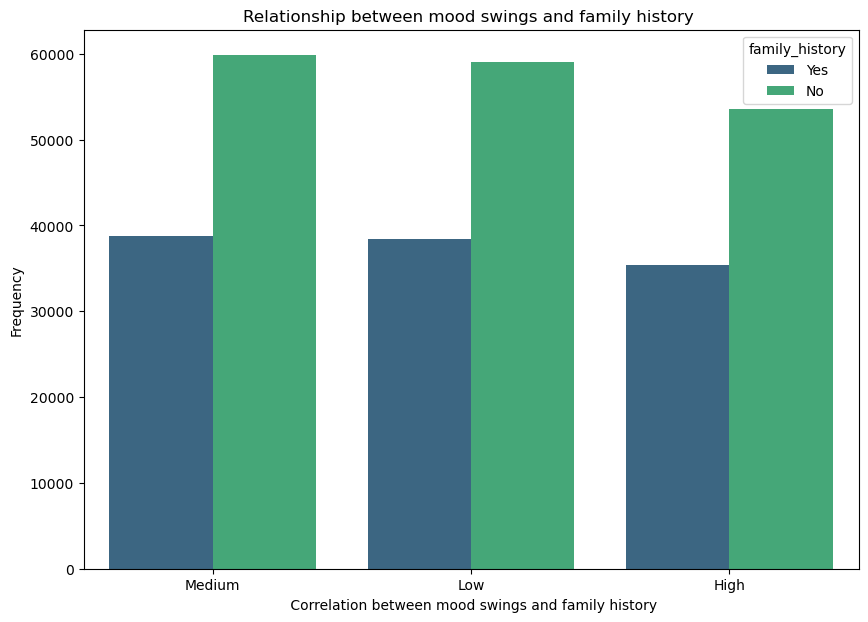

In [30]:

plt.figure(figsize=(10, 7))
sns.countplot(x='mood_swings', data=df, hue='family_history',  palette = 'viridis')
plt.title('Relationship between mood swings and family history ')
plt.xlabel(' Correlation between mood swings and family history')
plt.ylabel('Frequency')
plt.show()

In [31]:
## Interactive graph for distribution of country
import plotly.graph_objects as go

# Top 10 country in the dataset
country_count = df.groupby(['country']).agg(total_count=('treatment', 'count')).sort_values('total_count', ascending=False)
t10 = country_count.head(10)
go.Figure(
    data = go.Bar(x=t10.index, y=t10['total_count']),
    layout = go.Layout(
        title='Top 10 countries',
        yaxis=dict(
            title='Count'
        )
    )
).show(renderer='iframe')

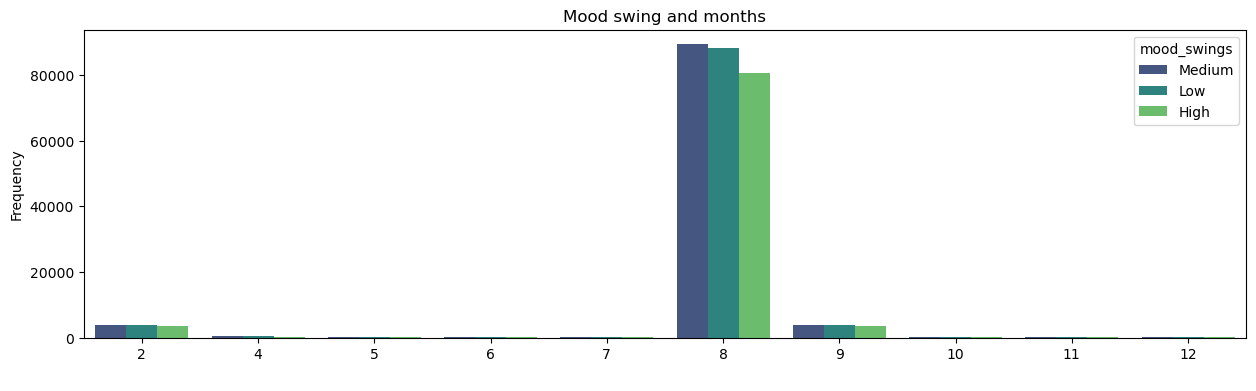

In [32]:

plt.figure(figsize=(15, 4))
sns.countplot(x='month', data=df, hue='mood_swings',  palette = 'viridis')
plt.title('Mood swing and months')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()


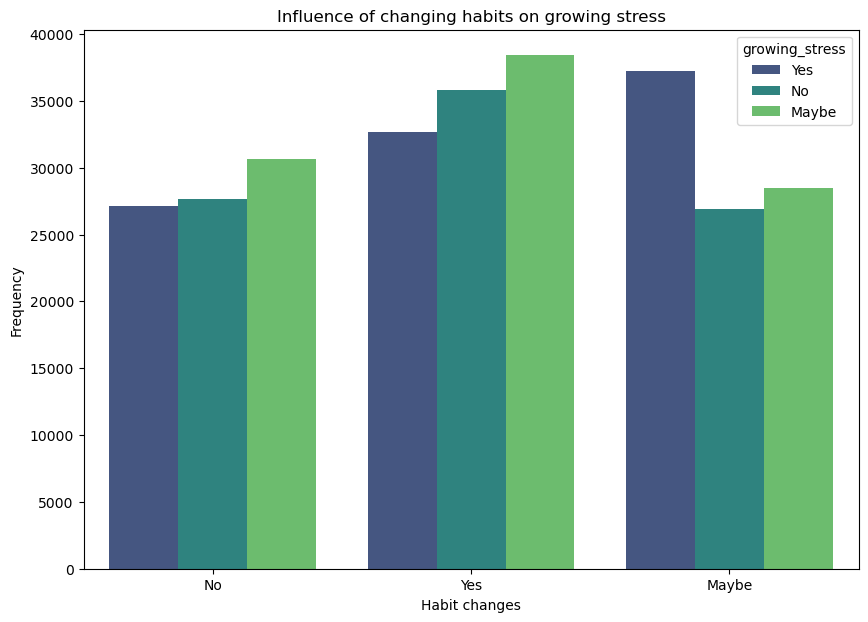

In [33]:

plt.figure(figsize=(10, 7))
sns.countplot(x='changes_habits', data=df, hue='growing_stress',  palette = 'viridis')
plt.title('Influence of changing habits on growing stress')
plt.xlabel('Habit changes')
plt.ylabel('Frequency')
plt.show()

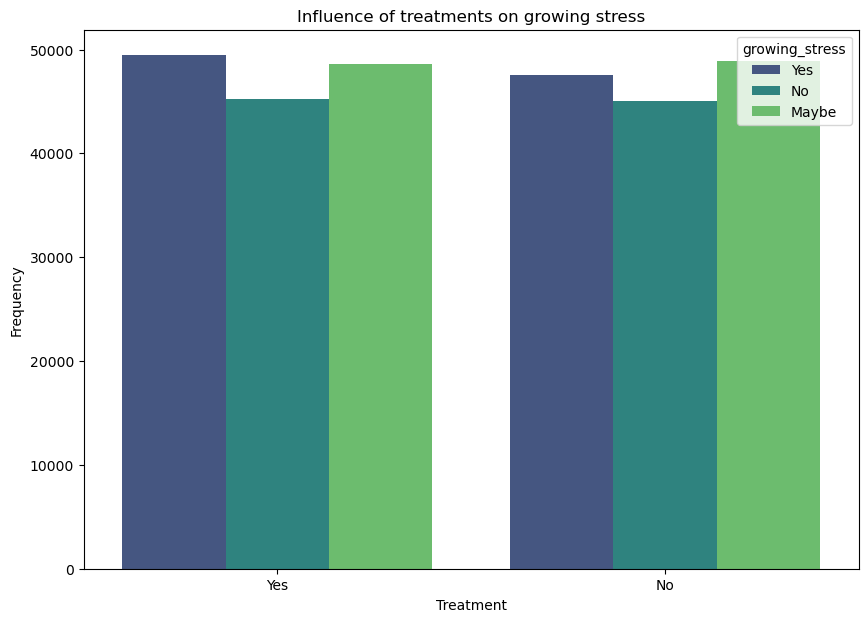

In [34]:

plt.figure(figsize=(10, 7))
sns.countplot(x='treatment', data=df, hue='growing_stress',  palette = 'viridis')
plt.title('Influence of treatments on growing stress')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.show()

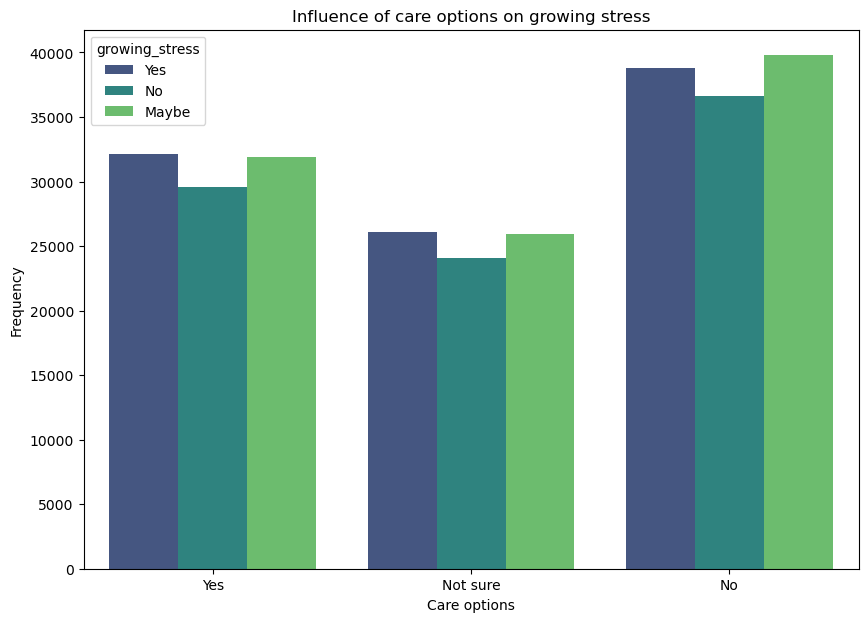

In [35]:

plt.figure(figsize=(10, 7))
sns.countplot(x='care_options', data=df, hue='growing_stress',  palette = 'viridis')
plt.title('Influence of care options on growing stress')
plt.xlabel('Care options')
plt.ylabel('Frequency')
plt.show()

C:\Users\saven\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1500x700 with 0 Axes>

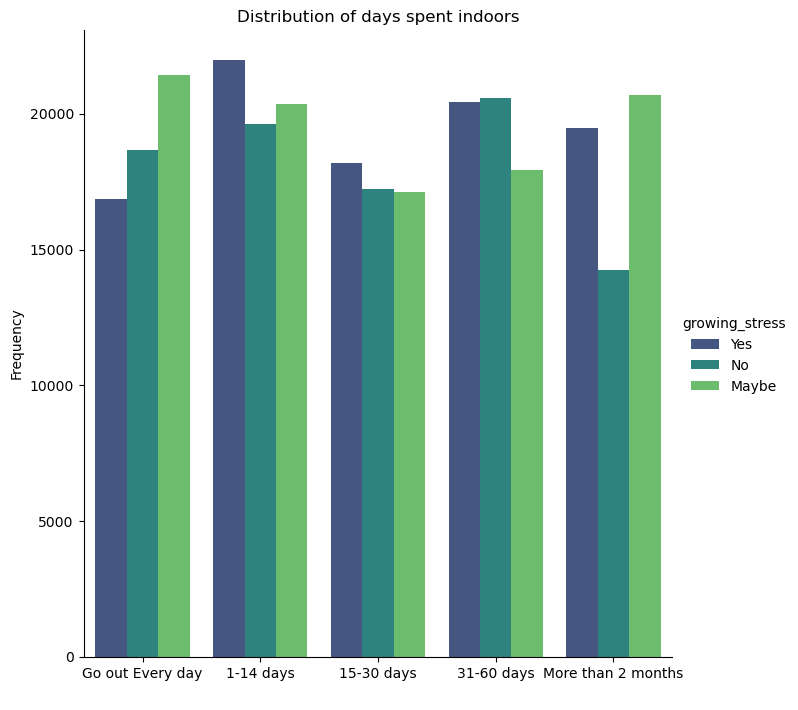

In [36]:

np.unique(df['days_indoors'])


plt.figure(figsize=(15, 7))
category_order=['Go out Every day', '1-14 days', '15-30 days', '31-60 days', 'More than 2 months']
sns.catplot(x='days_indoors', data=df, kind= 'count', palette = 'viridis', hue='growing_stress', \
            order=category_order, height=7)
plt.title('Distribution of days spent indoors')
plt.xlabel(' ')
plt.ylabel('Frequency')
plt.show()

In [37]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column
encoded_df = df.apply(label_encoder.fit_transform)

encoded_df

,timestamp,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,year,month
3,2,0,34,1,0,1,1,0,2,1,2,2,0,1,2,0,2,0,5
4,7,0,34,1,0,1,1,0,2,1,2,2,0,1,2,1,2,0,5
5,11,0,25,1,0,0,1,0,2,1,2,2,0,1,2,0,1,0,5
6,13,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1,0,5
7,14,0,34,1,0,0,0,0,2,1,2,2,0,1,2,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292359,569,1,34,0,1,1,1,1,1,0,1,1,1,1,0,0,1,1,4
292360,570,1,29,0,0,1,1,1,1,0,1,1,1,1,0,1,2,1,5
292361,571,1,34,0,0,1,0,1,1,0,1,1,1,1,0,1,0,1,5
292362,572,1,34,0,0,1,1,1,1,0,1,1,1,1,0,1,2,1,6


### Models - Mood Swings (Target Variable)

In [38]:
# Separate the features (X) and the target variable (y) from the encoded DataFrame.
# The features will be all columns except "Mood_Swings", which is the target variable.

features = encoded_df.drop("mood_swings", axis=1)  # Features (X) without the "Mood_Swings" column
target = encoded_df["mood_swings"]  # Target variable (y)
print(target)

3         2
4         2
5         2
6         2
7         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: mood_swings, Length: 284858, dtype: int32


In [39]:
# Split the data into training and testing sets.
# X (features) and y (target) are split into X_train, X_test, y_train, and y_test.
# test_size=0.2 means 20% of the data will be used for testing and 80% for training.
# random_state=42 ensures reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets to verify the split.
print(X_train.shape, X_test.shape)  # Output the shape of the training and testing feature sets
print(y_train.shape, y_test.shape)  # Output the shape of the training and testing target sets

(227886, 18) (56972, 18)
(227886,) (56972,)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17608
           1       0.98      0.98      0.98     19613
           2       0.96      0.95      0.96     19751

    accuracy                           0.96     56972
   macro avg       0.96      0.96      0.96     56972
weighted avg       0.96      0.96      0.96     56972

Confusion Matrix:
[[16947    97   564]
 [  171 19203   239]
 [  677   267 18807]]


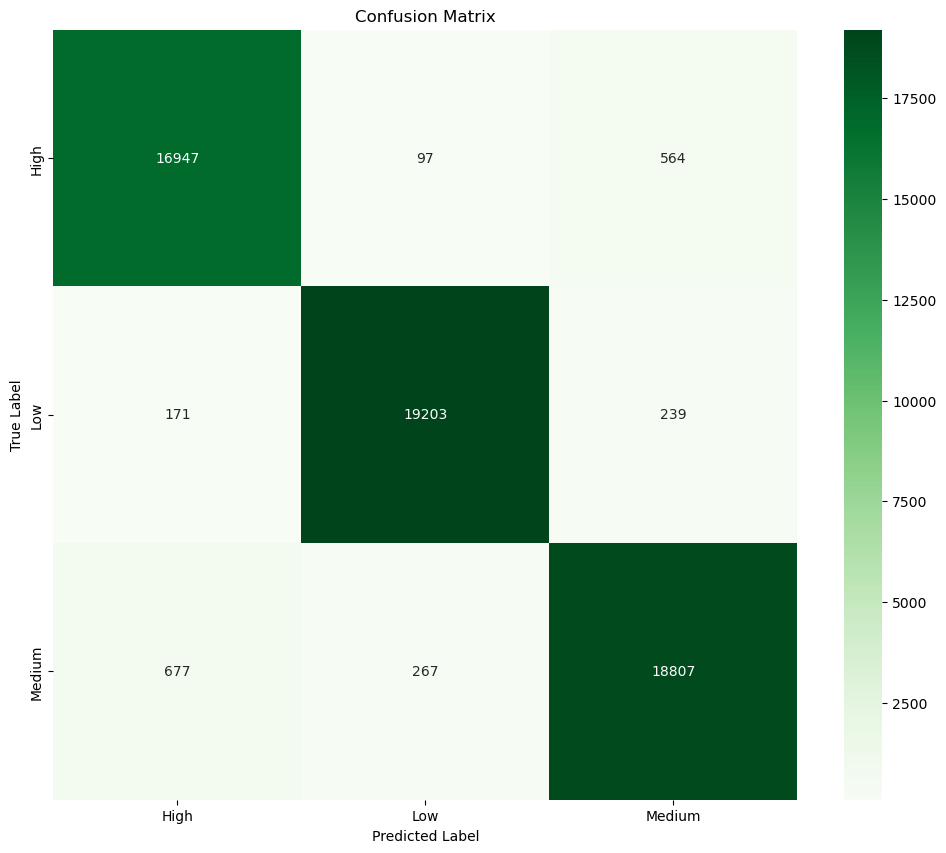

In [40]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     17608
           1       0.98      0.98      0.98     19613
           2       0.96      0.96      0.96     19751

    accuracy                           0.96     56972
   macro avg       0.96      0.96      0.96     56972
weighted avg       0.96      0.96      0.96     56972

Confusion Matrix:
[[16897   108   603]
 [  160 19195   258]
 [  638   248 18865]]


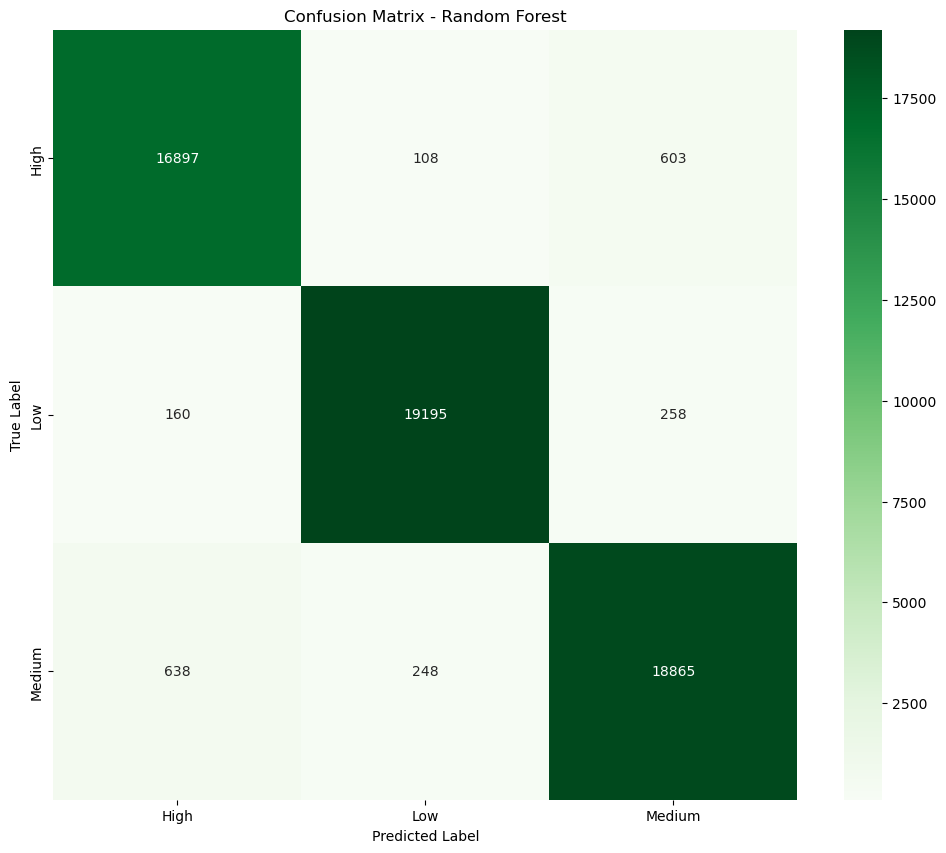

In [41]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17608
           1       0.99      0.98      0.99     19613
           2       0.97      0.97      0.97     19751

    accuracy                           0.97     56972
   macro avg       0.97      0.97      0.97     56972
weighted avg       0.97      0.97      0.97     56972

Confusion Matrix:
[[17211    30   367]
 [  169 19255   189]
 [  521   165 19065]]


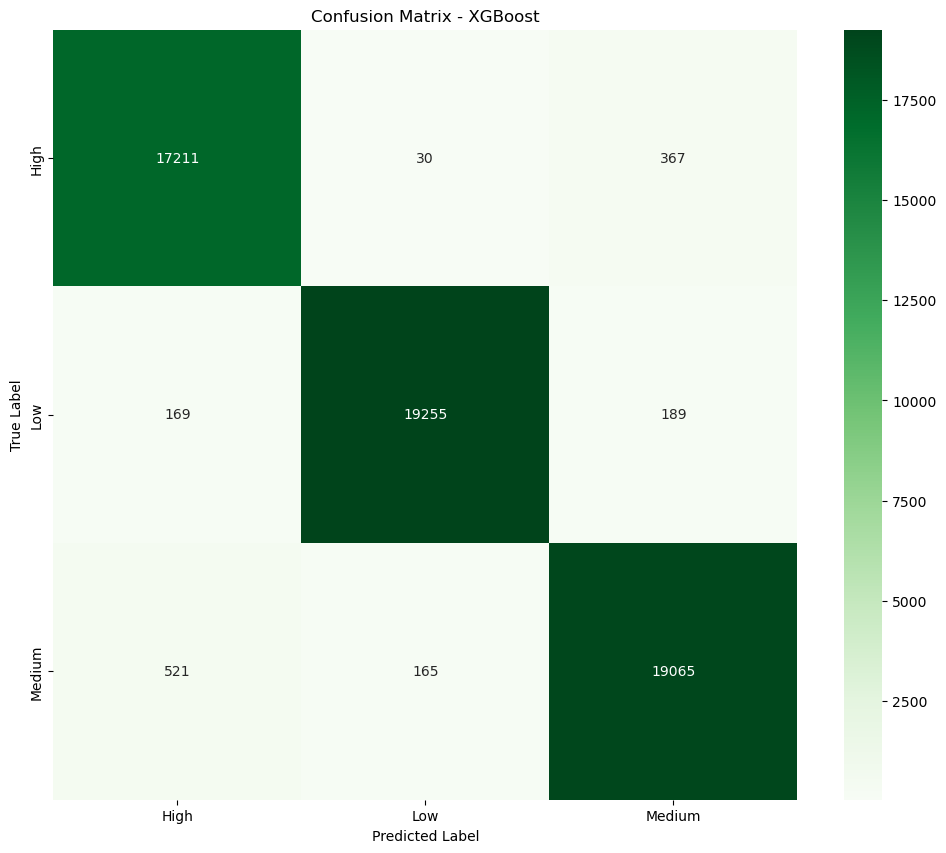

In [42]:
# Import necessary libraries
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 227886, number of used features: 18
[LightGBM] [Info] Start training from score -1.162426
[LightGBM] [Info] Start training from score -1.074974
[LightGBM] [Info] Start training from score -1.061412
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17608
           1       0.97      0.99      0.98     19613
           2       0.98      0.96      0.97     19751

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972

Confusion Matrix:
[[17079   168   361]
 [   58 19510    45]
 [  39

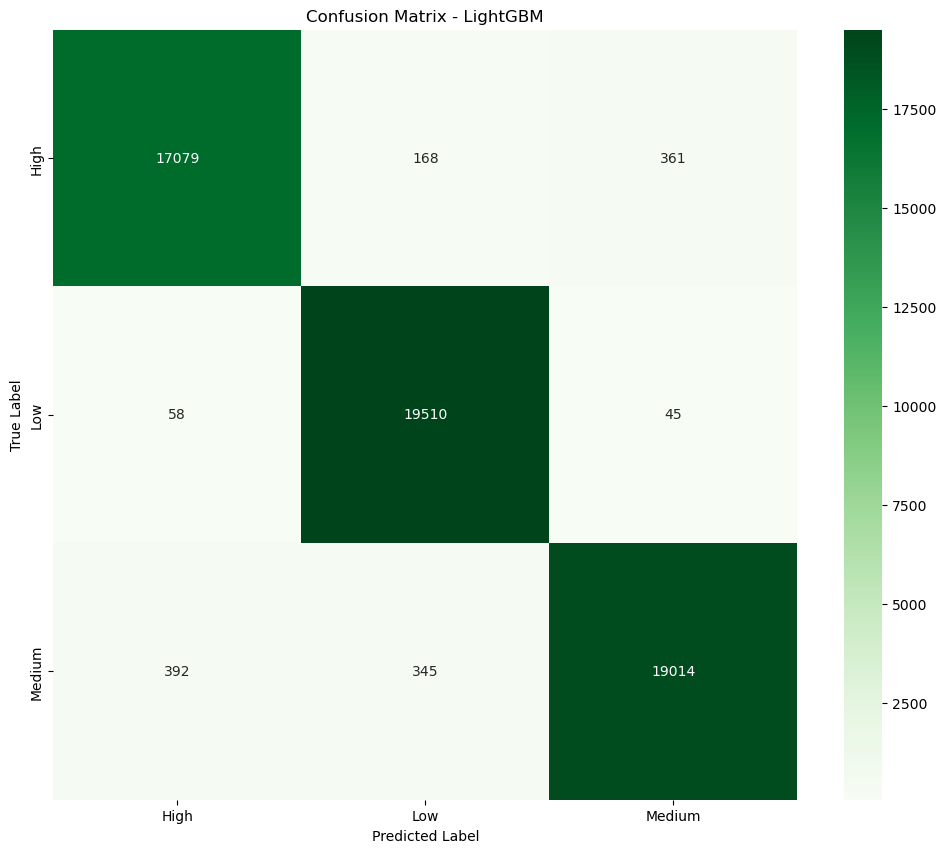

In [43]:
# Import necessary libraries
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the classifier on the training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()


### Models - Growing Stress (Target Variable)

In [44]:
# Separate the features (X) and the target variable (y) from the encoded DataFrame.
# The features will be all columns except "growing_stress", which is the target variable.

features = encoded_df.drop(["growing_stress", "timestamp"], axis=1)  # Features (X) without the "growing_stress" column
target = encoded_df["growing_stress"]  # Target variable (y)
print(target)

3         2
4         2
5         2
6         2
7         2
         ..
292359    1
292360    1
292361    1
292362    1
292363    1
Name: growing_stress, Length: 284858, dtype: int32


In [45]:
# Split the data into training and testing sets.
# X (features) and y (target) are split into X_train, X_test, y_train, and y_test.
# test_size=0.2 means 20% of the data will be used for testing and 80% for training.
# random_state=42 ensures reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets to verify the split.
print(X_train.shape, X_test.shape)  # Output the shape of the training and testing feature sets
print(y_train.shape, y_test.shape)  # Output the shape of the training and testing target sets

(227886, 17) (56972, 17)
(227886,) (56972,)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19557
           1       0.99      0.99      0.99     18115
           2       0.98      0.98      0.98     19300

    accuracy                           0.99     56972
   macro avg       0.99      0.99      0.99     56972
weighted avg       0.99      0.99      0.99     56972

Confusion Matrix:
[[19347     0   210]
 [    0 17960   155]
 [  226   253 18821]]


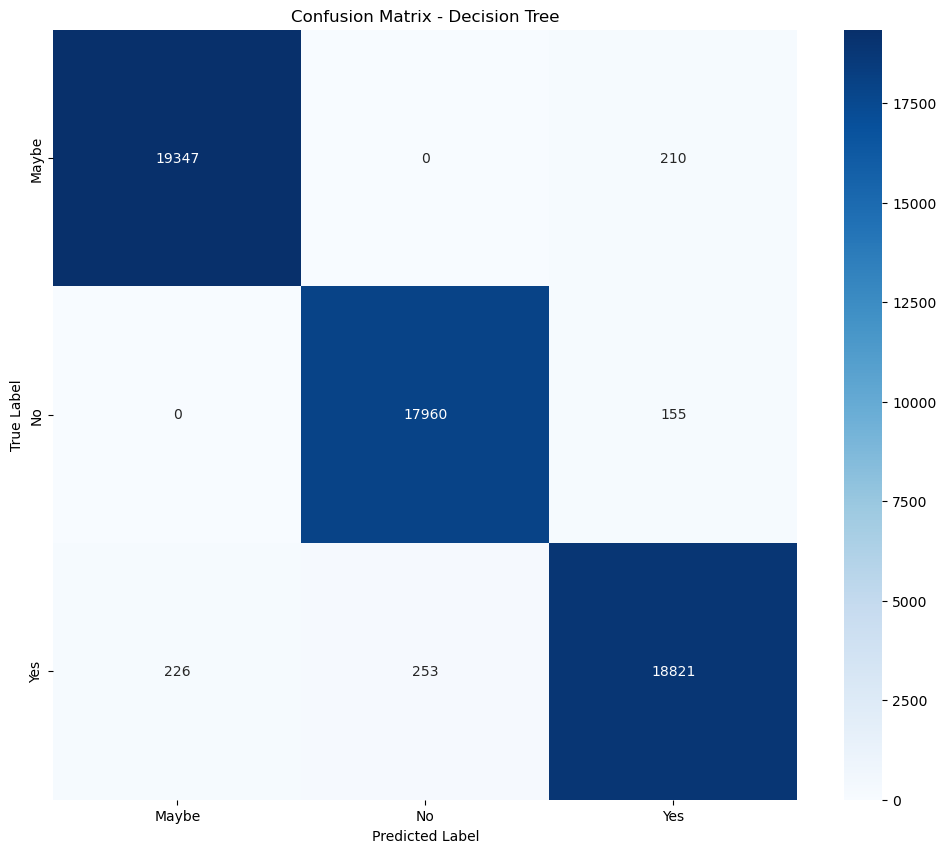

In [46]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Maybe', 'No', 'Yes'], yticklabels=['Maybe', 'No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

                    Feature  Importance
6              days_indoors    0.180721
2                occupation    0.167128
9               mood_swings    0.153914
12          social_weakness    0.124541
8     mental_health_history    0.105391
11            work_interest    0.078931
0                    gender    0.070660
7            changes_habits    0.059136
10         coping_struggles    0.058511
1                   country    0.000351
14             care_options    0.000230
13  mental_health_interview    0.000104
3             self_employed    0.000095
16                    month    0.000094
4            family_history    0.000083
5                 treatment    0.000067
15                     year    0.000044


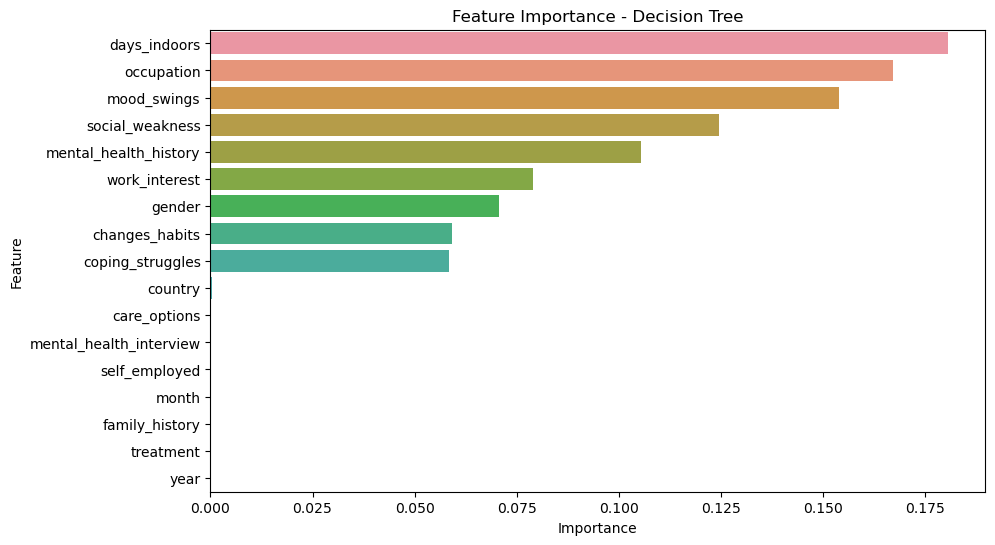

In [47]:
# Plot feature importance
feature_importances = dt_classifier.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Decision Tree')
plt.show()

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19557
           1       0.99      0.99      0.99     18115
           2       0.98      0.98      0.98     19300

    accuracy                           0.99     56972
   macro avg       0.99      0.99      0.99     56972
weighted avg       0.99      0.99      0.99     56972

Confusion Matrix:
[[19322     0   235]
 [    0 17928   187]
 [  201   221 18878]]


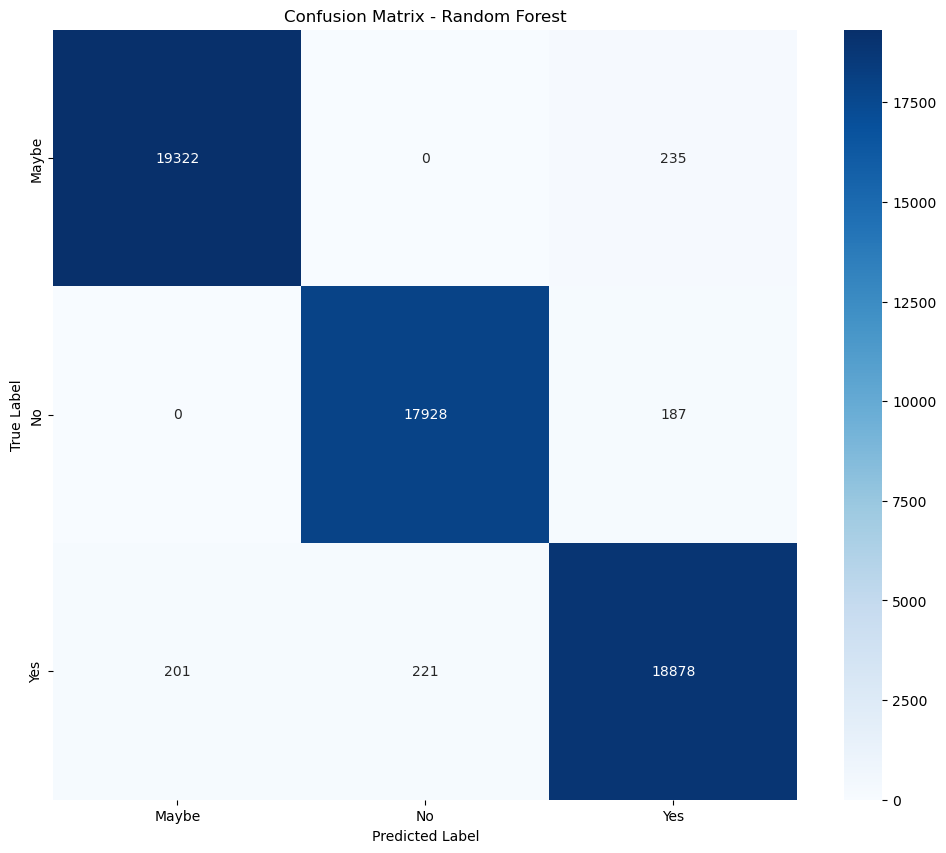

In [48]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Maybe', 'No', 'Yes'], yticklabels=['Maybe', 'No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

                    Feature  Importance
6              days_indoors    0.184993
2                occupation    0.165349
12          social_weakness    0.118514
9               mood_swings    0.109708
8     mental_health_history    0.105955
11            work_interest    0.099972
7            changes_habits    0.099330
10         coping_struggles    0.060566
0                    gender    0.043730
1                   country    0.003760
14             care_options    0.001701
16                    month    0.001429
13  mental_health_interview    0.001335
4            family_history    0.001298
5                 treatment    0.001116
3             self_employed    0.000724
15                     year    0.000520


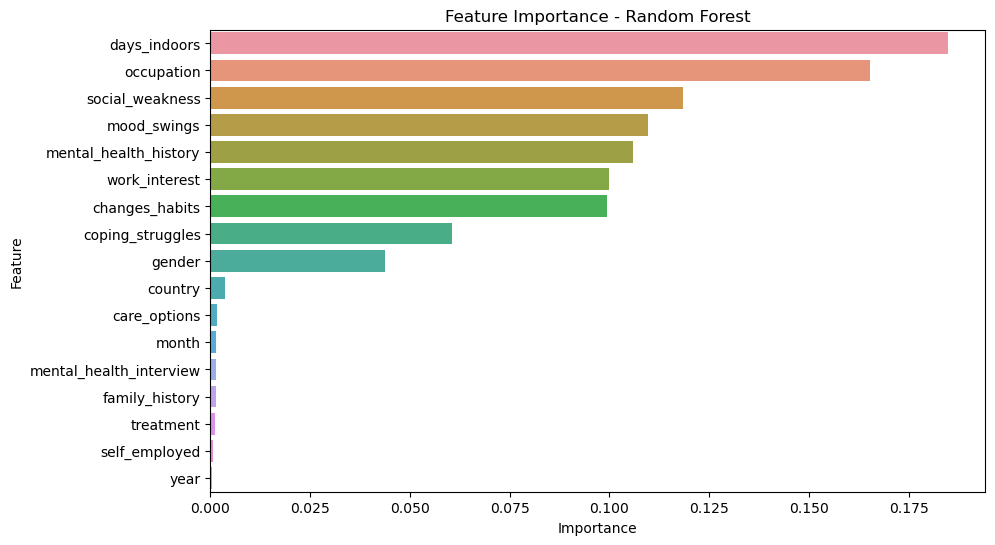

In [49]:
# Plot feature importance
feature_importances = rf_classifier.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 89
[LightGBM] [Info] Number of data points in the train set: 227886, number of used features: 17
[LightGBM] [Info] Start training from score -1.072355
[LightGBM] [Info] Start training from score -1.149059
[LightGBM] [Info] Start training from score -1.076273
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     19557
           1       0.99      0.98      0.99     18115
           2       0.99      0.97      0.98     19300

    accuracy                           0.98     56972
   macro avg       0.98      0.98      0.98     56972
weighted avg       0.98      0.98      0.98     56972

Confusion Matrix:
[[19410    47   100]
 [  112 17833   170]
 [  355

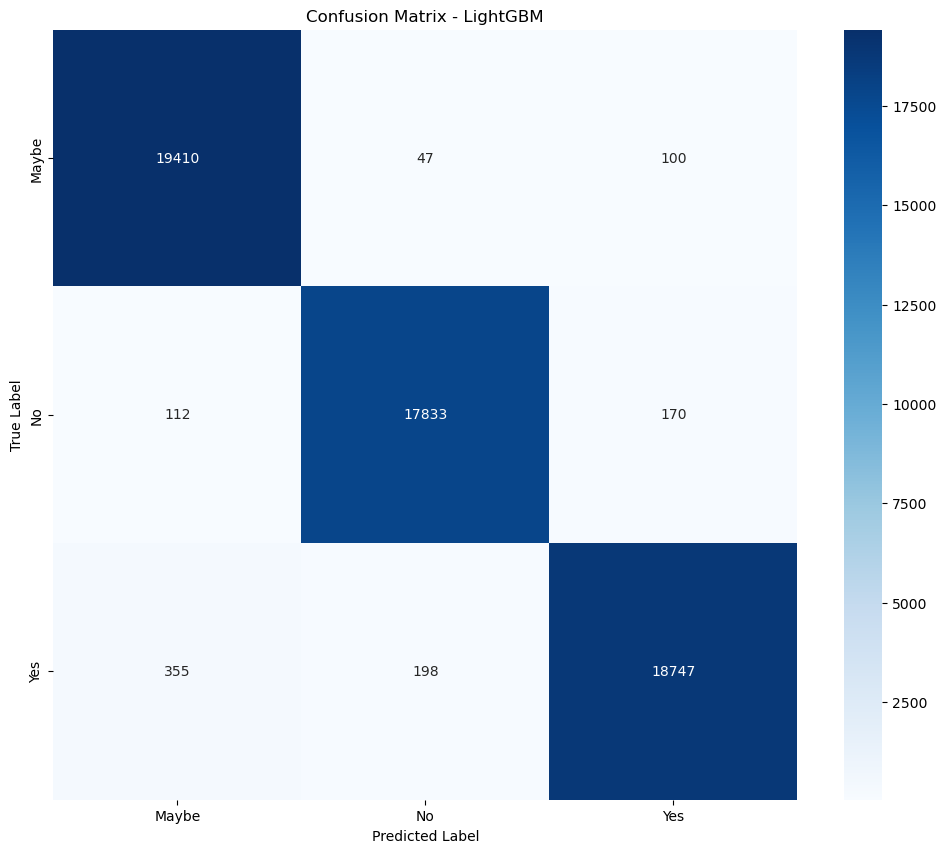

In [50]:
# Import necessary libraries
import lightgbm as lgb

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(random_state=42)

# Train the classifier on the training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Maybe', 'No', 'Yes'], yticklabels=['Maybe', 'No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - LightGBM')
plt.show()


                    Feature  Importance
6              days_indoors        1573
2                occupation        1232
12          social_weakness        1048
7            changes_habits        1043
8     mental_health_history         991
11            work_interest         950
9               mood_swings         884
0                    gender         717
10         coping_struggles         562
1                   country           0
5                 treatment           0
4            family_history           0
3             self_employed           0
13  mental_health_interview           0
14             care_options           0
15                     year           0
16                    month           0


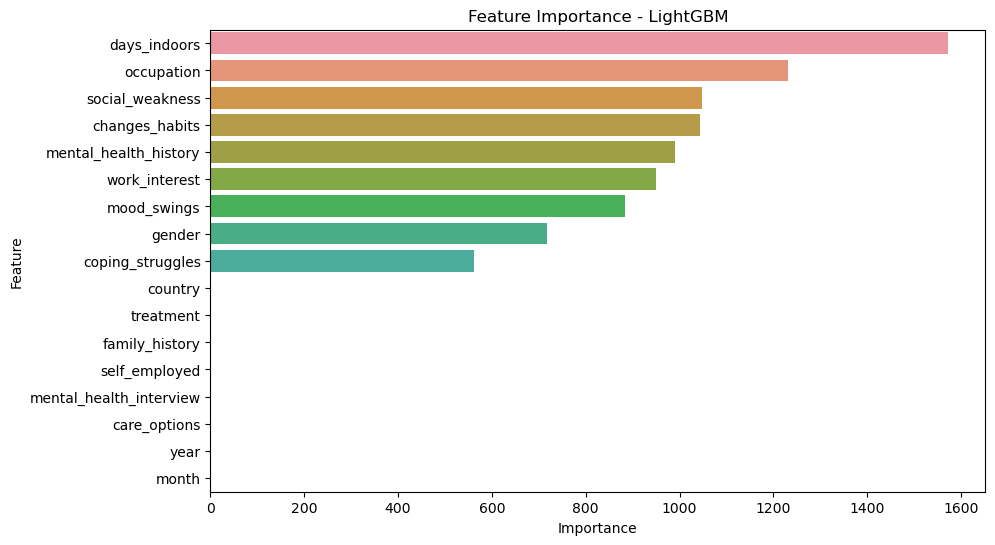

In [51]:
# Plot feature importance
feature_importances = lgb_classifier.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - LightGBM')
plt.show()

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19557
           1       0.99      1.00      0.99     18115
           2       0.98      0.98      0.98     19300

    accuracy                           0.99     56972
   macro avg       0.99      0.99      0.99     56972
weighted avg       0.99      0.99      0.99     56972

Confusion Matrix:
[[19324     0   233]
 [    0 18050    65]
 [  106   247 18947]]


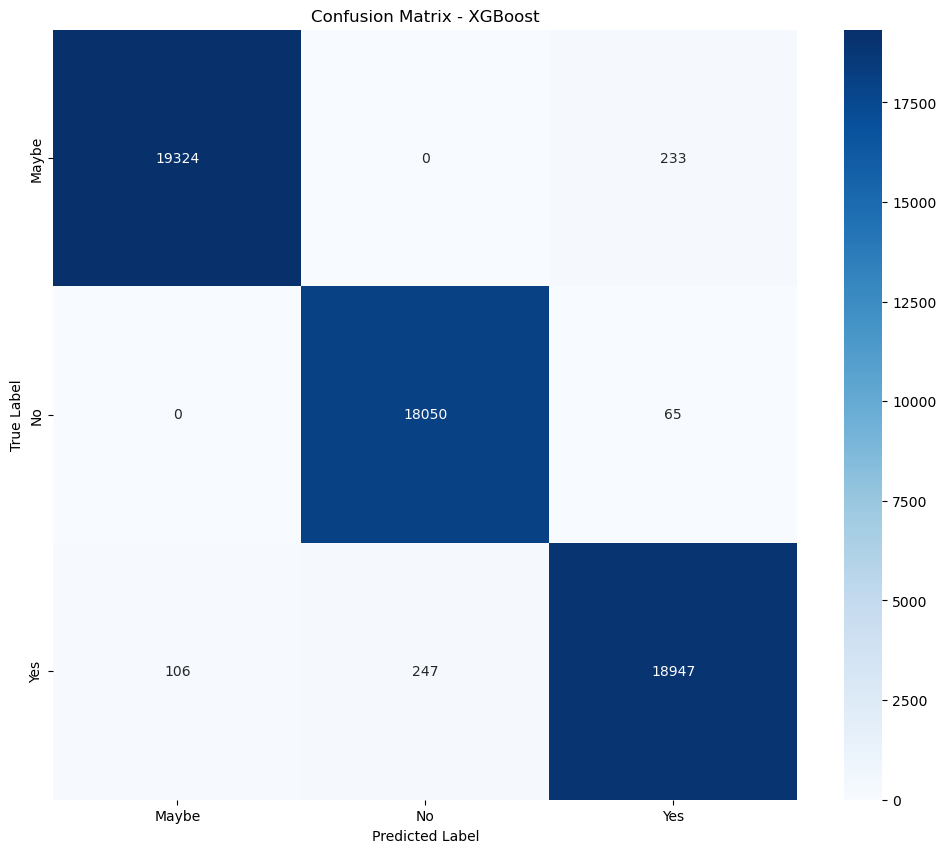

In [52]:
# Import necessary libraries
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Maybe', 'No', 'Yes'], yticklabels=['Maybe', 'No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

                    Feature  Importance
8     mental_health_history    0.121721
10         coping_struggles    0.121434
12          social_weakness    0.119013
6              days_indoors    0.115095
9               mood_swings    0.113064
7            changes_habits    0.112420
0                    gender    0.103524
11            work_interest    0.100172
2                occupation    0.090882
13  mental_health_interview    0.000619
1                   country    0.000548
5                 treatment    0.000431
15                     year    0.000353
16                    month    0.000278
14             care_options    0.000261
4            family_history    0.000184
3             self_employed    0.000000


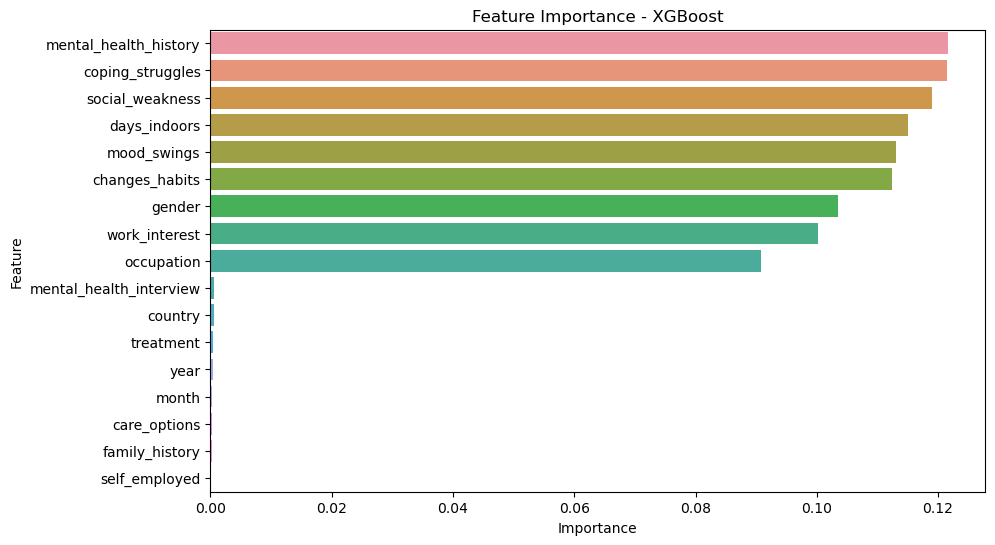

In [53]:
# Plot feature importance
feature_importances = xgb_classifier.feature_importances_
features = X_train.columns if isinstance(X_train, pd.DataFrame) else np.arange(X_train.shape[1])

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - XGBoost')
plt.show()